# World C02 Emission over the year

Data used in this visualization provided by worldbank.  

### Dataset

    http://data.worldbank.org/indicator/EN.ATM.CO2E.PC/


In [1]:
# Importing python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loding data set
raw_df = pd.read_csv("data/data.csv")

In [3]:
raw_df.shape

(266, 65)

In [4]:
raw_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [5]:
raw_df.head()

Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                           Indicator Name  Indicator Code        1960  \
0  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  204.631696   
1  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC    0.906060   
2  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC    0.046057   
3  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC    0.090880   
4  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC    0.100835   

         1961        1962        1963        1964        1965  ...      2011  \
0  208.837879  226.081890  214.785217  207.626699  185.213644  ...       NaN   
1    0.922474    0.930816    0.940570    0.996033    1.047280  ...  1.005338   
2    0.053589    0.073721    0.074161    0.086174    0.101285  ...  0.407074   
3    0.095283    0.096612    0.112376    0.133258    0.184803  ...  0.497023   
4    0.082204    0.210533    0.202739    0.213562    0.205891  ...  1.216317   

       2012      2013      2014      2015      2016      2017      2018  2019  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   NaN   
1  1.021646  1.031833  1.041145  0.987393  0.971016  0.959978  0.933541   NaN   
2  0.335351  0.263716  0.234037  0.232176  0.208857  0.203328  0.200151   NaN   
3  0.490867  0.504655  0.507671  0.480743  0.472959  0.476438  0.515544   NaN   
4  1.204799  1.261542  1.285365  1.260921  1.227703  1.034317  0.887380   NaN   

   2020  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN  

[5 rows x 65 columns]

In [6]:
# Merging all year columns into one
id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']

In [7]:
df = pd.melt(frame=raw_df,id_vars=id_vars, var_name="year", value_name="value")

In [8]:
# Formatting 
df["year"] = df["year"].str.extract('(\d+)', expand=False).astype(int)
df["value"] = df["value"].astype(float)

In [9]:
# Cleaning out unnecessary rows with empty values
df = df.dropna()

In [10]:
df.shape

(13342, 6)

In [11]:
df.describe()

year         value
count  13342.000000  13342.000000
mean    1989.874681      4.508567
std       16.962019     11.384938
min     1960.000000     -0.020098
25%     1975.000000      0.472275
50%     1991.000000      1.757034
75%     2005.000000      5.831920
max     2018.000000    360.853233

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13342 entries, 0 to 15693
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    13342 non-null  object 
 1   Country Code    13342 non-null  object 
 2   Indicator Name  13342 non-null  object 
 3   Indicator Code  13342 non-null  object 
 4   year            13342 non-null  int32  
 5   value           13342 non-null  float64
dtypes: float64(1), int32(1), object(4)
memory usage: 677.5+ KB


In [13]:
df.head()

Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                           Indicator Name  Indicator Code  year       value  
0  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  1960  204.631696  
1  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  1960    0.906060  
2  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  1960    0.046057  
3  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  1960    0.090880  
4  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  1960    0.100835

In [14]:
df[df['Country Name']== 'Canada']

Country Name Country Code                          Indicator Name  \
35          Canada          CAN  CO2 emissions (metric tons per capita)   
301         Canada          CAN  CO2 emissions (metric tons per capita)   
567         Canada          CAN  CO2 emissions (metric tons per capita)   
833         Canada          CAN  CO2 emissions (metric tons per capita)   
1099        Canada          CAN  CO2 emissions (metric tons per capita)   
1365        Canada          CAN  CO2 emissions (metric tons per capita)   
1631        Canada          CAN  CO2 emissions (metric tons per capita)   
1897        Canada          CAN  CO2 emissions (metric tons per capita)   
2163        Canada          CAN  CO2 emissions (metric tons per capita)   
2429        Canada          CAN  CO2 emissions (metric tons per capita)   
2695        Canada          CAN  CO2 emissions (metric tons per capita)   
2961        Canada          CAN  CO2 emissions (metric tons per capita)   
3227        Canada          CAN  CO2 emissions (metric tons per capita)   
3493        Canada          CAN  CO2 emissions (metric tons per capita)   
3759        Canada          CAN  CO2 emissions (metric tons per capita)   
4025        Canada          CAN  CO2 emissions (metric tons per capita)   
4291        Canada          CAN  CO2 emissions (metric tons per capita)   
4557        Canada          CAN  CO2 emissions (metric tons per capita)   
4823        Canada          CAN  CO2 emissions (metric tons per capita)   
5089        Canada          CAN  CO2 emissions (metric tons per capita)   
5355        Canada          CAN  CO2 emissions (metric tons per capita)   
5621        Canada          CAN  CO2 emissions (metric tons per capita)   
5887        Canada          CAN  CO2 emissions (metric tons per capita)   
6153        Canada          CAN  CO2 emissions (metric tons per capita)   
6419        Canada          CAN  CO2 emissions (metric tons per capita)   
6685        Canada          CAN  CO2 emissions (metric tons per capita)   
6951        Canada          CAN  CO2 emissions (metric tons per capita)   
7217        Canada          CAN  CO2 emissions (metric tons per capita)   
7483        Canada          CAN  CO2 emissions (metric tons per capita)   
7749        Canada          CAN  CO2 emissions (metric tons per capita)   
8015        Canada          CAN  CO2 emissions (metric tons per capita)   
8281        Canada          CAN  CO2 emissions (metric tons per capita)   
8547        Canada          CAN  CO2 emissions (metric tons per capita)   
8813        Canada          CAN  CO2 emissions (metric tons per capita)   
9079        Canada          CAN  CO2 emissions (metric tons per capita)   
9345        Canada          CAN  CO2 emissions (metric tons per capita)   
9611        Canada          CAN  CO2 emissions (metric tons per capita)   
9877        Canada          CAN  CO2 emissions (metric tons per capita)   
10143       Canada          CAN  CO2 emissions (metric tons per capita)   
10409       Canada          CAN  CO2 emissions (metric tons per capita)   
10675       Canada          CAN  CO2 emissions (metric tons per capita)   
10941       Canada          CAN  CO2 emissions (metric tons per capita)   
11207       Canada          CAN  CO2 emissions (metric tons per capita)   
11473       Canada          CAN  CO2 emissions (metric tons per capita)   
11739       Canada          CAN  CO2 emissions (metric tons per capita)   
12005       Canada          CAN  CO2 emissions (metric tons per capita)   
12271       Canada          CAN  CO2 emissions (metric tons per capita)   
12537       Canada          CAN  CO2 emissions (metric tons per capita)   
12803       Canada          CAN  CO2 emissions (metric tons per capita)   
13069       Canada          CAN  CO2 emissions (metric tons per capita)   
13335       Canada          CAN  CO2 emissions (metric tons per capita)   
13601       Canada          CAN  CO2 emissions (metric tons per capita)   
13867       Canada          CAN

In [15]:
# importing country metadata
country_meta =pd.read_csv("data/Metadata_Country_API_EN.ATM.CO2E.PC_DS2_en_csv_v2_3053008.csv",encoding = "utf-8")

In [16]:
country_meta.head()

Country Code                     Region          IncomeGroup  \
0          ABW  Latin America & Caribbean          High income   
1          AFE                        NaN                  NaN   
2          AFG                 South Asia           Low income   
3          AFW                        NaN                  NaN   
4          AGO         Sub-Saharan Africa  Lower middle income   

                                        SpecialNotes  \
0                                                NaN   
1  26 countries, stretching from the Red Sea in t...   
2  Fiscal year end: March 20; reporting period fo...   
3  22 countries, stretching from the westernmost ...   
4                                                NaN   

                     TableName  Unnamed: 5  
0                        Aruba         NaN  
1  Africa Eastern and Southern         NaN  
2                  Afghanistan         NaN  
3   Africa Western and Central         NaN  
4                       Angola         NaN

In [17]:
# Merging country_meta based on country code

merged_df = pd.merge(df,country_meta, on = "Country Code")

In [18]:
merged_df.shape

(13342, 11)

In [19]:
merged_df.head()

Country Name Country Code                          Indicator Name  \
0        Aruba          ABW  CO2 emissions (metric tons per capita)   
1        Aruba          ABW  CO2 emissions (metric tons per capita)   
2        Aruba          ABW  CO2 emissions (metric tons per capita)   
3        Aruba          ABW  CO2 emissions (metric tons per capita)   
4        Aruba          ABW  CO2 emissions (metric tons per capita)   

   Indicator Code  year       value                     Region  IncomeGroup  \
0  EN.ATM.CO2E.PC  1960  204.631696  Latin America & Caribbean  High income   
1  EN.ATM.CO2E.PC  1961  208.837879  Latin America & Caribbean  High income   
2  EN.ATM.CO2E.PC  1962  226.081890  Latin America & Caribbean  High income   
3  EN.ATM.CO2E.PC  1963  214.785217  Latin America & Caribbean  High income   
4  EN.ATM.CO2E.PC  1964  207.626699  Latin America & Caribbean  High income   

  SpecialNotes TableName  Unnamed: 5  
0          NaN     Aruba         NaN  
1          NaN     Aruba         NaN  
2          NaN     Aruba         NaN  
3          NaN     Aruba         NaN  
4          NaN     Aruba         NaN

In [20]:
# Droping unneccary column
merged_df.drop(columns=["Unnamed: 5"], inplace=True)

In [21]:
merged_df.tail()

Country Name Country Code                          Indicator Name  \
13337      Namibia          NAM  CO2 emissions (metric tons per capita)   
13338      Namibia          NAM  CO2 emissions (metric tons per capita)   
13339      Namibia          NAM  CO2 emissions (metric tons per capita)   
13340      Namibia          NAM  CO2 emissions (metric tons per capita)   
13341      Namibia          NAM  CO2 emissions (metric tons per capita)   

       Indicator Code  year     value              Region  \
13337  EN.ATM.CO2E.PC  2014  1.759459  Sub-Saharan Africa   
13338  EN.ATM.CO2E.PC  2015  1.844571  Sub-Saharan Africa   
13339  EN.ATM.CO2E.PC  2016  1.848990  Sub-Saharan Africa   
13340  EN.ATM.CO2E.PC  2017  1.802197  Sub-Saharan Africa   
13341  EN.ATM.CO2E.PC  2018  1.735898  Sub-Saharan Africa   

               IncomeGroup                                       SpecialNotes  \
13337  Upper middle income  Fiscal year end: March 31; reporting period fo...   
13338  Upper middle income  Fiscal year end: March 31; reporting period fo...   
13339  Upper middle income  Fiscal year end: March 31; reporting period fo...   
13340  Upper middle income  Fiscal year end: March 31; reporting period fo...   
13341  Upper middle income  Fiscal year end: March 31; reporting period fo...   

      TableName  
13337   Namibia  
13338   Namibia  
13339   Namibia  
13340   Namibia  
13341   Namibia

### Which countries have the highest CO2 emissions per capita in 2015?

In [22]:
merged_df[merged_df['year']== 2015].sort_values('value',ascending=False).head()

Country Name Country Code  \
9025                 Qatar          QAT   
5867                Kuwait          KWT   
1029               Bahrain          BHR   
439   United Arab Emirates          ARE   
9320          Saudi Arabia          SAU   

                              Indicator Name  Indicator Code  year      value  \
9025  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  2015  32.470570   
5867  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  2015  22.953456   
1029  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  2015  22.305597   
439   CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  2015  20.948092   
9320  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  2015  17.691712   

                          Region  IncomeGroup SpecialNotes  \
9025  Middle East & North Africa  High income          NaN   
5867  Middle East & North Africa  High income          NaN   
1029  Middle East & North Africa  High income          NaN   
439   Middle East & North Africa  High income          NaN   
9320  Middle East & North Africa  High income          NaN   

                 TableName  
9025                 Qatar  
5867                Kuwait  
1029               Bahrain  
439   United Arab Emirates  
9320          Saudi Arabia

In [28]:
highest_co2_emission_2015 = merged_df[merged_df['year']== 2015].sort_values('value',ascending=False)

In [34]:
sns.set(rc={"figure.figsize":(13, 6)})

<AxesSubplot:xlabel='value', ylabel='Country Name'>

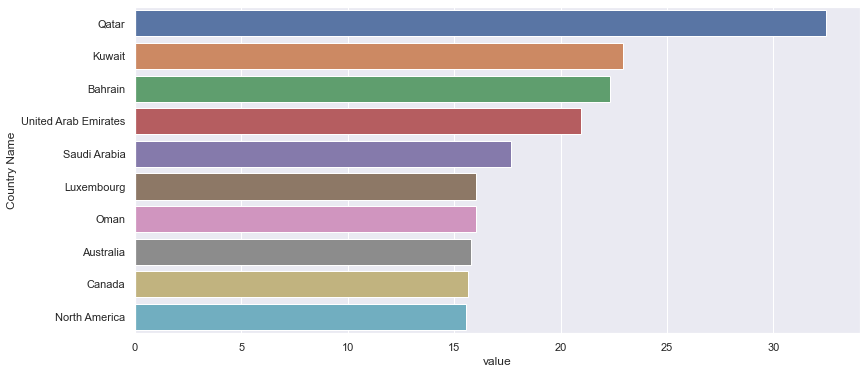

In [40]:
sns.barplot(y="Country Name", x="value", data = highest_co2_emission_2015[:10], orient="h")

##### Qatar is highest co2 emission per capita in 2015 with value of 32.470570

In [38]:
merged_df[merged_df['year']== 2018].sort_values('value',ascending=False).head()

Country Name Country Code  \
9028                 Qatar          QAT   
5870                Kuwait          KWT   
442   United Arab Emirates          ARE   
1032               Bahrain          BHR   
1416     Brunei Darussalam          BRN   

                              Indicator Name  Indicator Code  year      value  \
9028  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  2018  32.415639   
5870  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  2018  21.622724   
442   CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  2018  20.797498   
1032  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  2018  19.592976   
1416  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  2018  16.644909   

                          Region  IncomeGroup SpecialNotes  \
9028  Middle East & North Africa  High income          NaN   
5870  Middle East & North Africa  High income          NaN   
442   Middle East & North Africa  High income          NaN   
1032  Middle East & North Africa  High income          NaN   
1416         East Asia & Pacific  High income          NaN   

                 TableName  
9028                 Qatar  
5870                Kuwait  
442   United Arab Emirates  
1032               Bahrain  
1416     Brunei Darussalam

<AxesSubplot:xlabel='value', ylabel='Country Name'>

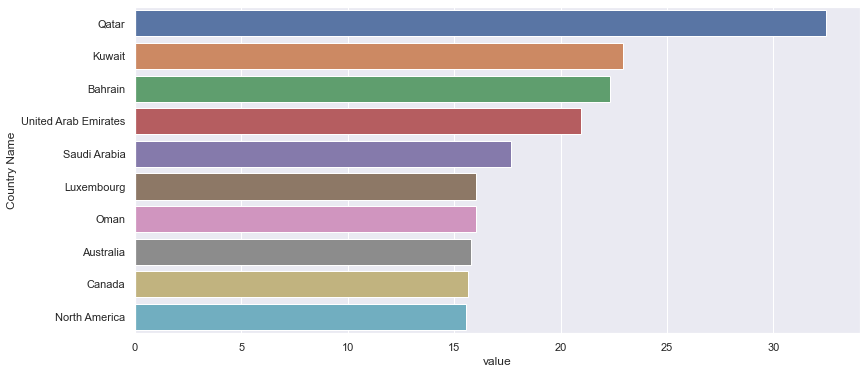

In [41]:
highest_co2_emission_2018 = merged_df[merged_df['year']== 2015].sort_values('value',ascending=False)
sns.barplot(y="Country Name", x="value", data = highest_co2_emission_2018[:10], orient="h")

##### In 2018 also qatar is highest co2 emission per capita

### Which countries have the Lowest CO2 emissions per capita in 2015?

In [40]:
merged_df[merged_df['year']== 2015].sort_values('value',ascending=True).head()

Country Name Country Code  \
1944           Congo, Dem. Rep.          COD   
11793                   Burundi          BDI   
9733                    Somalia          SOM   
10262                      Chad          TCD   
1472   Central African Republic          CAF   

                               Indicator Name  Indicator Code  year     value  \
1944   CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  2015  0.037904   
11793  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  2015  0.040354   
9733   CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  2015  0.047111   
10262  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  2015  0.068741   
1472   CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  2015  0.068994   

                   Region IncomeGroup SpecialNotes                 TableName  
1944   Sub-Saharan Africa  Low income          NaN          Congo, Dem. Rep.  
11793  Sub-Saharan Africa  Low income          NaN                   Burundi  
9733   Sub-Saharan Africa  Low income          NaN                   Somalia  
10262  Sub-Saharan Africa  Low income          NaN                      Chad  
1472   Sub-Saharan Africa  Low income          NaN  Central African Republic

<AxesSubplot:xlabel='value', ylabel='Country Name'>

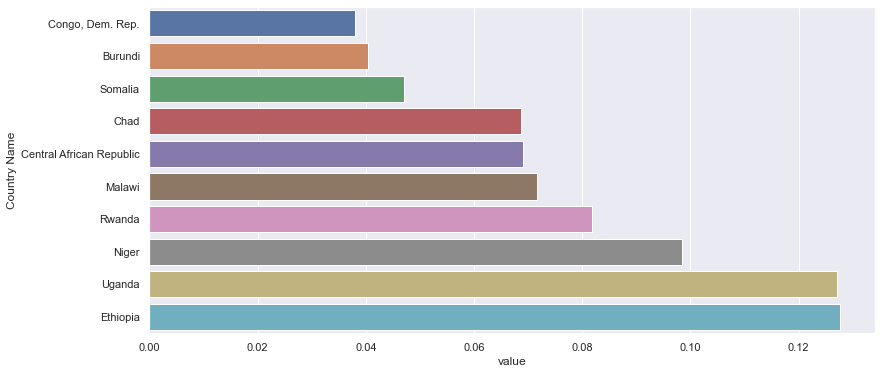

In [42]:
lowest_co2_emission_2015 = merged_df[merged_df['year']== 2015].sort_values('value',ascending=True)
sns.barplot(y="Country Name", x="value", data = lowest_co2_emission_2015[:10], orient="h")

##### Congo is lowest co2 emission per capita in 2015 with value of 0.037

<AxesSubplot:xlabel='value', ylabel='Country Name'>

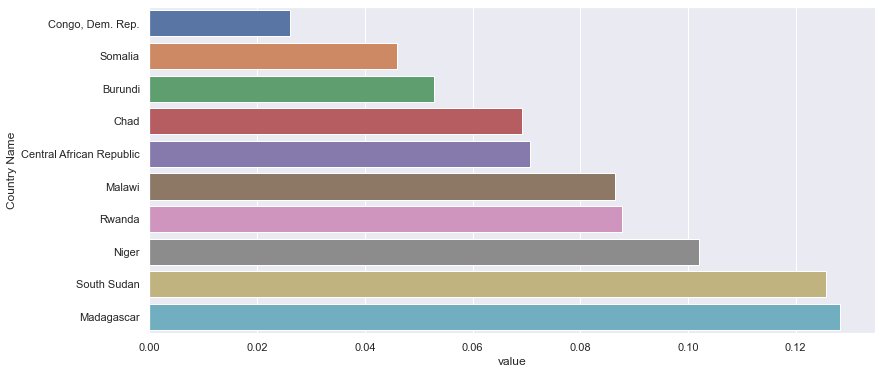

In [43]:
lowest_co2_emission_2018 = merged_df[merged_df['year']== 2018].sort_values('value',ascending=True)
sns.barplot(y="Country Name", x="value", data = lowest_co2_emission_2018[:10], orient="h")

## How co2 emission chaged over years across all countries

In [44]:
groupby_year = merged_df.groupby(by="year").sum()

In [46]:
groupby_year.head()

value
year            
1960  641.524584
1961  671.637032
1962  713.182461
1963  808.543175
1964  853.498221

In [51]:
groupby_year.reset_index(inplace=True)

<AxesSubplot:xlabel='year', ylabel='value'>

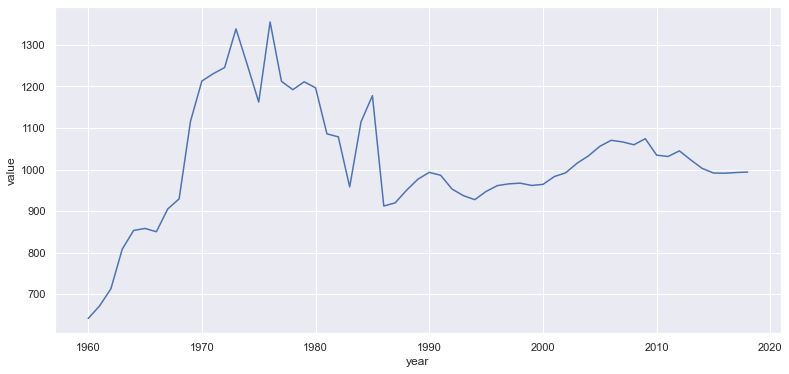

In [54]:
sns.lineplot(x="year", y="value", data = groupby_year)

There is huge spike on co2 emisison during the year 1970's

## How co2 emission occured based on region

In [56]:
groupby_region = merged_df.groupby(by="Region").mean()

In [57]:
groupby_region.reset_index(inplace=True)

<AxesSubplot:xlabel='Region', ylabel='value'>

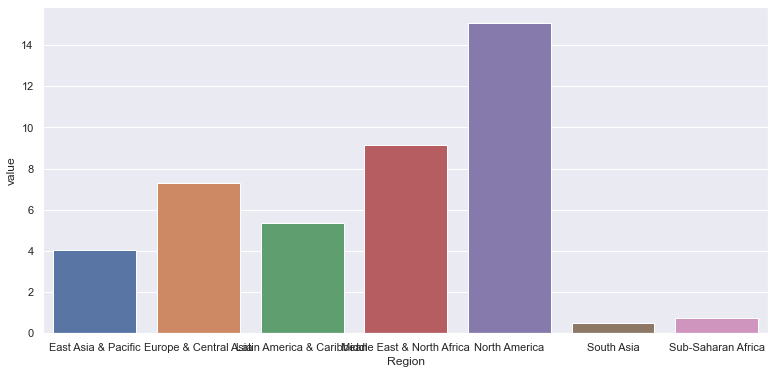

In [59]:
sns.barplot(x="Region", y="value", data = groupby_region)

##### North america released more co2 than any other region(with all the years combined)

## How co2 emission occured based on region and year

In [62]:
groupby_region_year = merged_df.groupby(by=["Region","year"]).mean()

In [65]:
groupby_region_year.reset_index(inplace=True)

In [66]:
groupby_region_year.head()

Region  year     value
0  East Asia & Pacific  1960  1.579130
1  East Asia & Pacific  1961  1.692558
2  East Asia & Pacific  1962  1.569295
3  East Asia & Pacific  1963  1.643264
4  East Asia & Pacific  1964  2.030266

In [71]:
groupby_region_year["Region"].value_counts()

East Asia & Pacific           59
Europe & Central Asia         59
Latin America & Caribbean     59
Middle East & North Africa    59
North America                 59
South Asia                    59
Sub-Saharan Africa            59
Name: Region, dtype: int64

<AxesSubplot:xlabel='year', ylabel='value'>

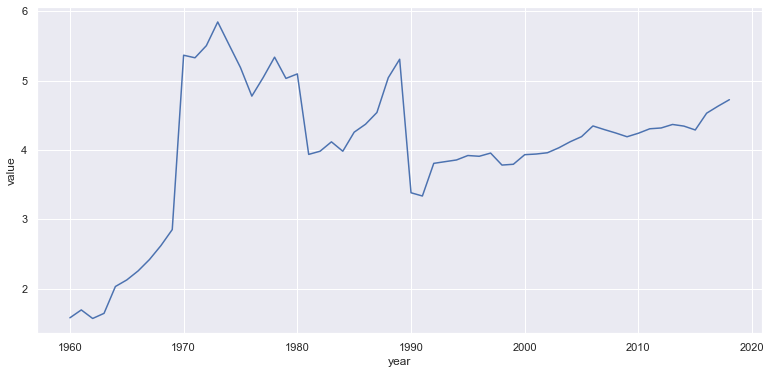

In [70]:
# Yearly co2 emission from East asia & pacific
sns.lineplot(y="value", x="year", data = groupby_region_year[groupby_region_year["Region"] == "East Asia & Pacific"])

<AxesSubplot:xlabel='year', ylabel='value'>

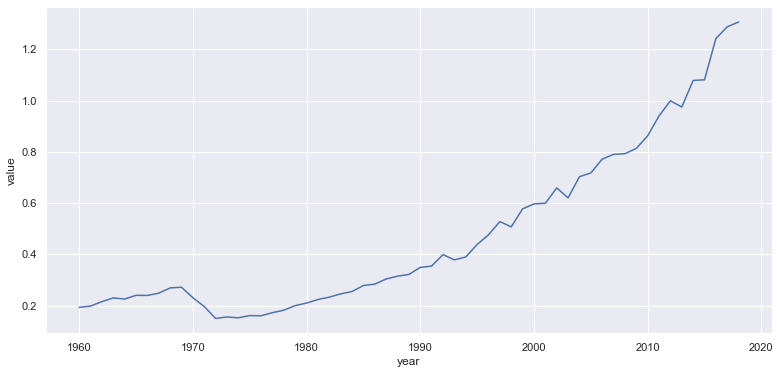

In [72]:
# Yearly co2 emission from South Asia
sns.lineplot(y="value", x="year", data = groupby_region_year[groupby_region_year["Region"] == "South Asia"])

<AxesSubplot:xlabel='year', ylabel='value'>

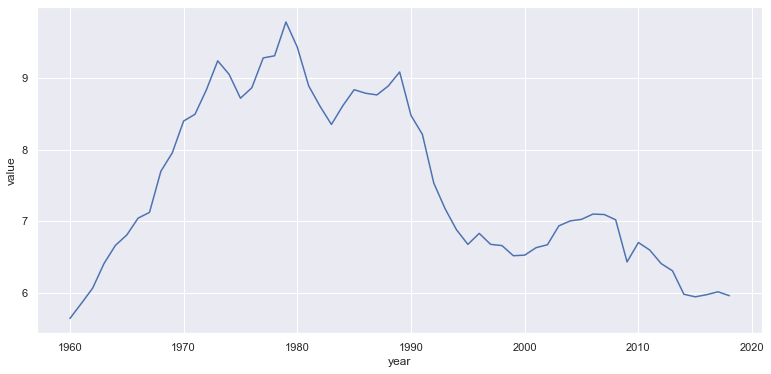

In [73]:
# Yearly co2 emission from Europe & Central Asia
sns.lineplot(y="value", x="year", data = groupby_region_year[groupby_region_year["Region"] == "Europe & Central Asia"])

#### Based on above two plots europen coutries emission stared to reduce and south asian coutries co2 emision increased gradually at the same time.

## Grouo by country

In [78]:
groupby_country = merged_df.groupby(by=["Country Name", "year"]).mean()

In [79]:
groupby_country.reset_index(inplace=True)

In [80]:
groupby_country.head()

Country Name  year     value
0  Afghanistan  1960  0.046057
1  Afghanistan  1961  0.053589
2  Afghanistan  1962  0.073721
3  Afghanistan  1963  0.074161
4  Afghanistan  1964  0.086174

In [83]:
def progress_over_year(country):
    return sns.lineplot(y="value", x="year", data = groupby_country[groupby_country["Country Name"] == country])

<AxesSubplot:xlabel='year', ylabel='value'>

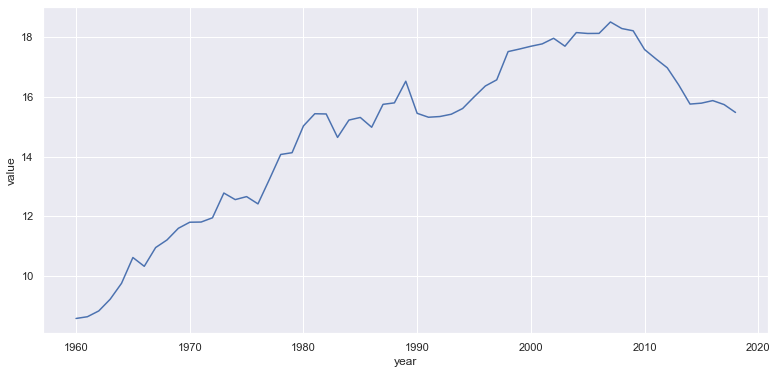

In [85]:
progress_over_year("Australia")

<AxesSubplot:xlabel='year', ylabel='value'>

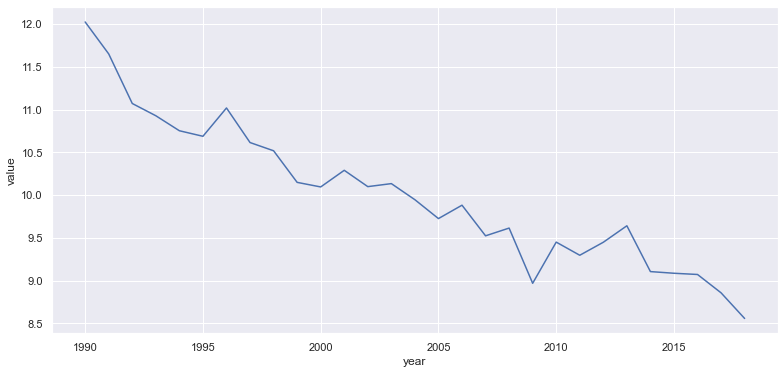

In [86]:
progress_over_year("Germany")

<AxesSubplot:xlabel='year', ylabel='value'>

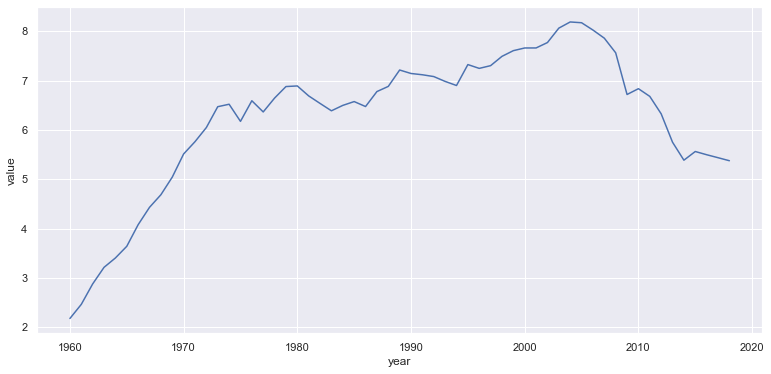

In [87]:
progress_over_year("Italy")

<AxesSubplot:xlabel='year', ylabel='value'>

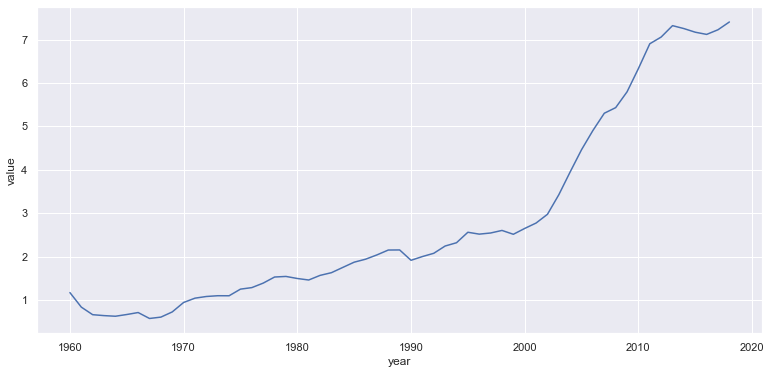

In [88]:
progress_over_year("China")